<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
cols = ['time', 'missing_info', 'job_id', 'task_index', 'machine_id',
       'event_type', 'user', 'scheduling_class', 'priority', 'cpu_request',
       'memory_request', 'disk_space_request',
       'different_machine_restriction']

In [34]:
os.listdir("/media/quangkhanh/E/google_data/clusterdata-2011-2/task_events/")

['part-00001-of-00500.csv',
 'part-00002-of-00500.csv',
 'part-00003-of-00500.csv',
 'part-00000-of-00500.csv',
 'part-00008-of-00500.csv',
 'part-00004-of-00500.csv',
 'part-00007-of-00500.csv',
 'part-00006-of-00500.csv',
 'part-00005-of-00500.csv']

In [35]:
rate = {}
task_event_root = "/media/quangkhanh/E/google_data/clusterdata-2011-2/task_events/"
for task_event_path in os.listdir(task_event_root):
    task_event = pd.read_csv(os.path.join(task_event_root, task_event_path))
    task_event.columns = cols
    interval = (task_event.time.max() - task_event.time.min()) / 1000000
    comming_rate = task_event.shape[0] / interval
    rate[task_event_path[5:10]] = comming_rate

In [41]:
task_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167470 entries, 0 to 167469
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   time                           167470 non-null  int64  
 1   missing_info                   0 non-null       float64
 2   job_id                         167470 non-null  int64  
 3   task_index                     167470 non-null  int64  
 4   machine_id                     95973 non-null   float64
 5   event_type                     167470 non-null  int64  
 6   user                           167470 non-null  object 
 7   scheduling_class               167470 non-null  int64  
 8   priority                       167470 non-null  int64  
 9   cpu_request                    167470 non-null  float64
 10  memory_request                 167470 non-null  float64
 11  disk_space_request             167470 non-null  float64
 12  different_machine_restriction 

In [82]:
rate = pd.Series(rate,name="rate").drop("00000")
rate

00001    15.522206
00002    34.047785
00003    23.033342
00008    26.492498
00004    23.067898
00007    37.589733
00006    30.736422
00005    33.425493
Name: rate, dtype: float64

27.989422228262928

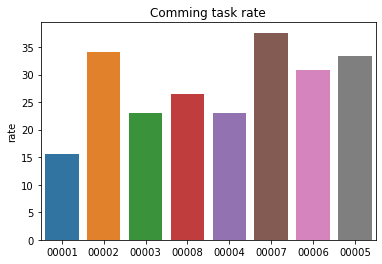

In [85]:
plt.figure()
sns.barplot(x=rate.index, y=rate)
plt.title("Comming task rate")
rate.mean()

In [2]:
machine_event_path = "/media/quangkhanh/E/google_data/clusterdata-2011-2/machine_events/part-00000-of-00001.csv"

In [4]:
machine_event = pd.read_csv(machine_event_path)
machine_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37780 entries, 0 to 37779
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         37780 non-null  int64  
 1   machine_id   37780 non-null  int64  
 2   event_type   37780 non-null  int64  
 3   platform_id  37780 non-null  object 
 4   cpus         37748 non-null  float64
 5   memory       37748 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.7+ MB


In [5]:
machine_event = machine_event[["machine_id", "cpus", "memory"]]
machine_attri = machine_event.groupby("machine_id").max()

In [6]:
machine_attri.describe()

,cpus,memory
count,12583.000000,12583.000000
mean,0.529206,0.470091
std,0.125015,0.201338
min,0.250000,0.030850
25%,0.500000,0.249300
50%,0.500000,0.499500
75%,0.500000,0.499500
max,1.000000,1.000000


<AxesSubplot:ylabel='cpus'>

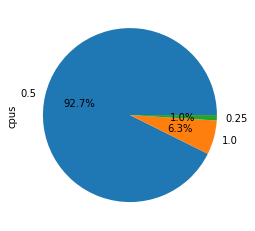

In [7]:
machine_attri.cpus.value_counts().plot.pie(autopct="%.1f%%")

In [8]:
machine_memory = machine_attri.memory.value_counts()[machine_attri.memory.value_counts() > 100]

<AxesSubplot:ylabel='memory'>

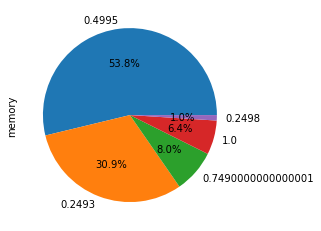

In [9]:
machine_memory.plot.pie(autopct="%.1f%%")

In [ ]:
machine_attri.cpus.value_counts().plot.pie(autopct="%.1f%%")
machine_memory.plot.pie(autopct="%.1f%%")

In [10]:
cpu_machine = machine_attri.cpus.value_counts()

In [14]:
cpu_machine.keys()

Float64Index([0.5, 1.0, 0.25], dtype='float64')

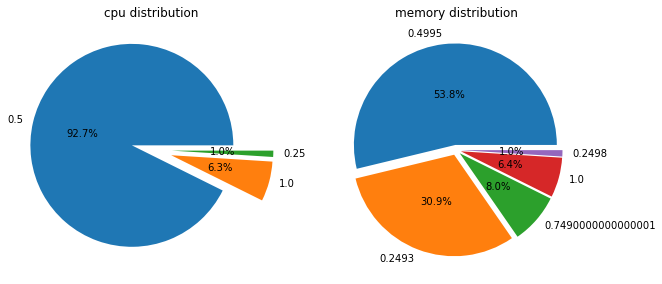

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10,6])
ax1.pie(x=cpu_machine, autopct="%.1f%%", explode=[0.2]*len(cpu_machine), labels=cpu_machine.keys(), pctdistance=0.5)
ax1.set_title("cpu distribution")
ax2.pie(x=machine_memory, autopct="%.1f%%", explode=[0.05]*len(machine_memory), labels=machine_memory.keys(), pctdistance=0.5)
ax2.set_title("memory distribution")
plt.show()